In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("tennis_stats.csv")
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
print(df.columns)
df.info()

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   17

In [4]:
df = df[['FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon', 'SecondServePointsWon', 'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted', 'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved', 'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalPointsWon', 'TotalServicePointsWon', 'Winnings']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FirstServe                  1721 non-null   float64
 1   FirstServePointsWon         1721 non-null   float64
 2   FirstServeReturnPointsWon   1721 non-null   float64
 3   SecondServePointsWon        1721 non-null   float64
 4   SecondServeReturnPointsWon  1721 non-null   float64
 5   Aces                        1721 non-null   int64  
 6   BreakPointsConverted        1721 non-null   float64
 7   BreakPointsFaced            1721 non-null   int64  
 8   BreakPointsOpportunities    1721 non-null   int64  
 9   BreakPointsSaved            1721 non-null   float64
 10  DoubleFaults                1721 non-null   int64  
 11  ReturnGamesPlayed           1721 non-null   int64  
 12  ReturnGamesWon              1721 non-null   float64
 13  ReturnPointsWon             1721 

In [5]:
df = df[['FirstServePointsWon', 'FirstServeReturnPointsWon', 'SecondServePointsWon', 'SecondServeReturnPointsWon', 'BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed', 'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalPointsWon', 'TotalServicePointsWon', 'Winnings']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FirstServePointsWon         1721 non-null   float64
 1   FirstServeReturnPointsWon   1721 non-null   float64
 2   SecondServePointsWon        1721 non-null   float64
 3   SecondServeReturnPointsWon  1721 non-null   float64
 4   BreakPointsFaced            1721 non-null   int64  
 5   BreakPointsOpportunities    1721 non-null   int64  
 6   DoubleFaults                1721 non-null   int64  
 7   ReturnGamesPlayed           1721 non-null   int64  
 8   ReturnPointsWon             1721 non-null   float64
 9   ServiceGamesPlayed          1721 non-null   int64  
 10  ServiceGamesWon             1721 non-null   float64
 11  TotalPointsWon              1721 non-null   float64
 12  TotalServicePointsWon       1721 non-null   float64
 13  Winnings                    1721 

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


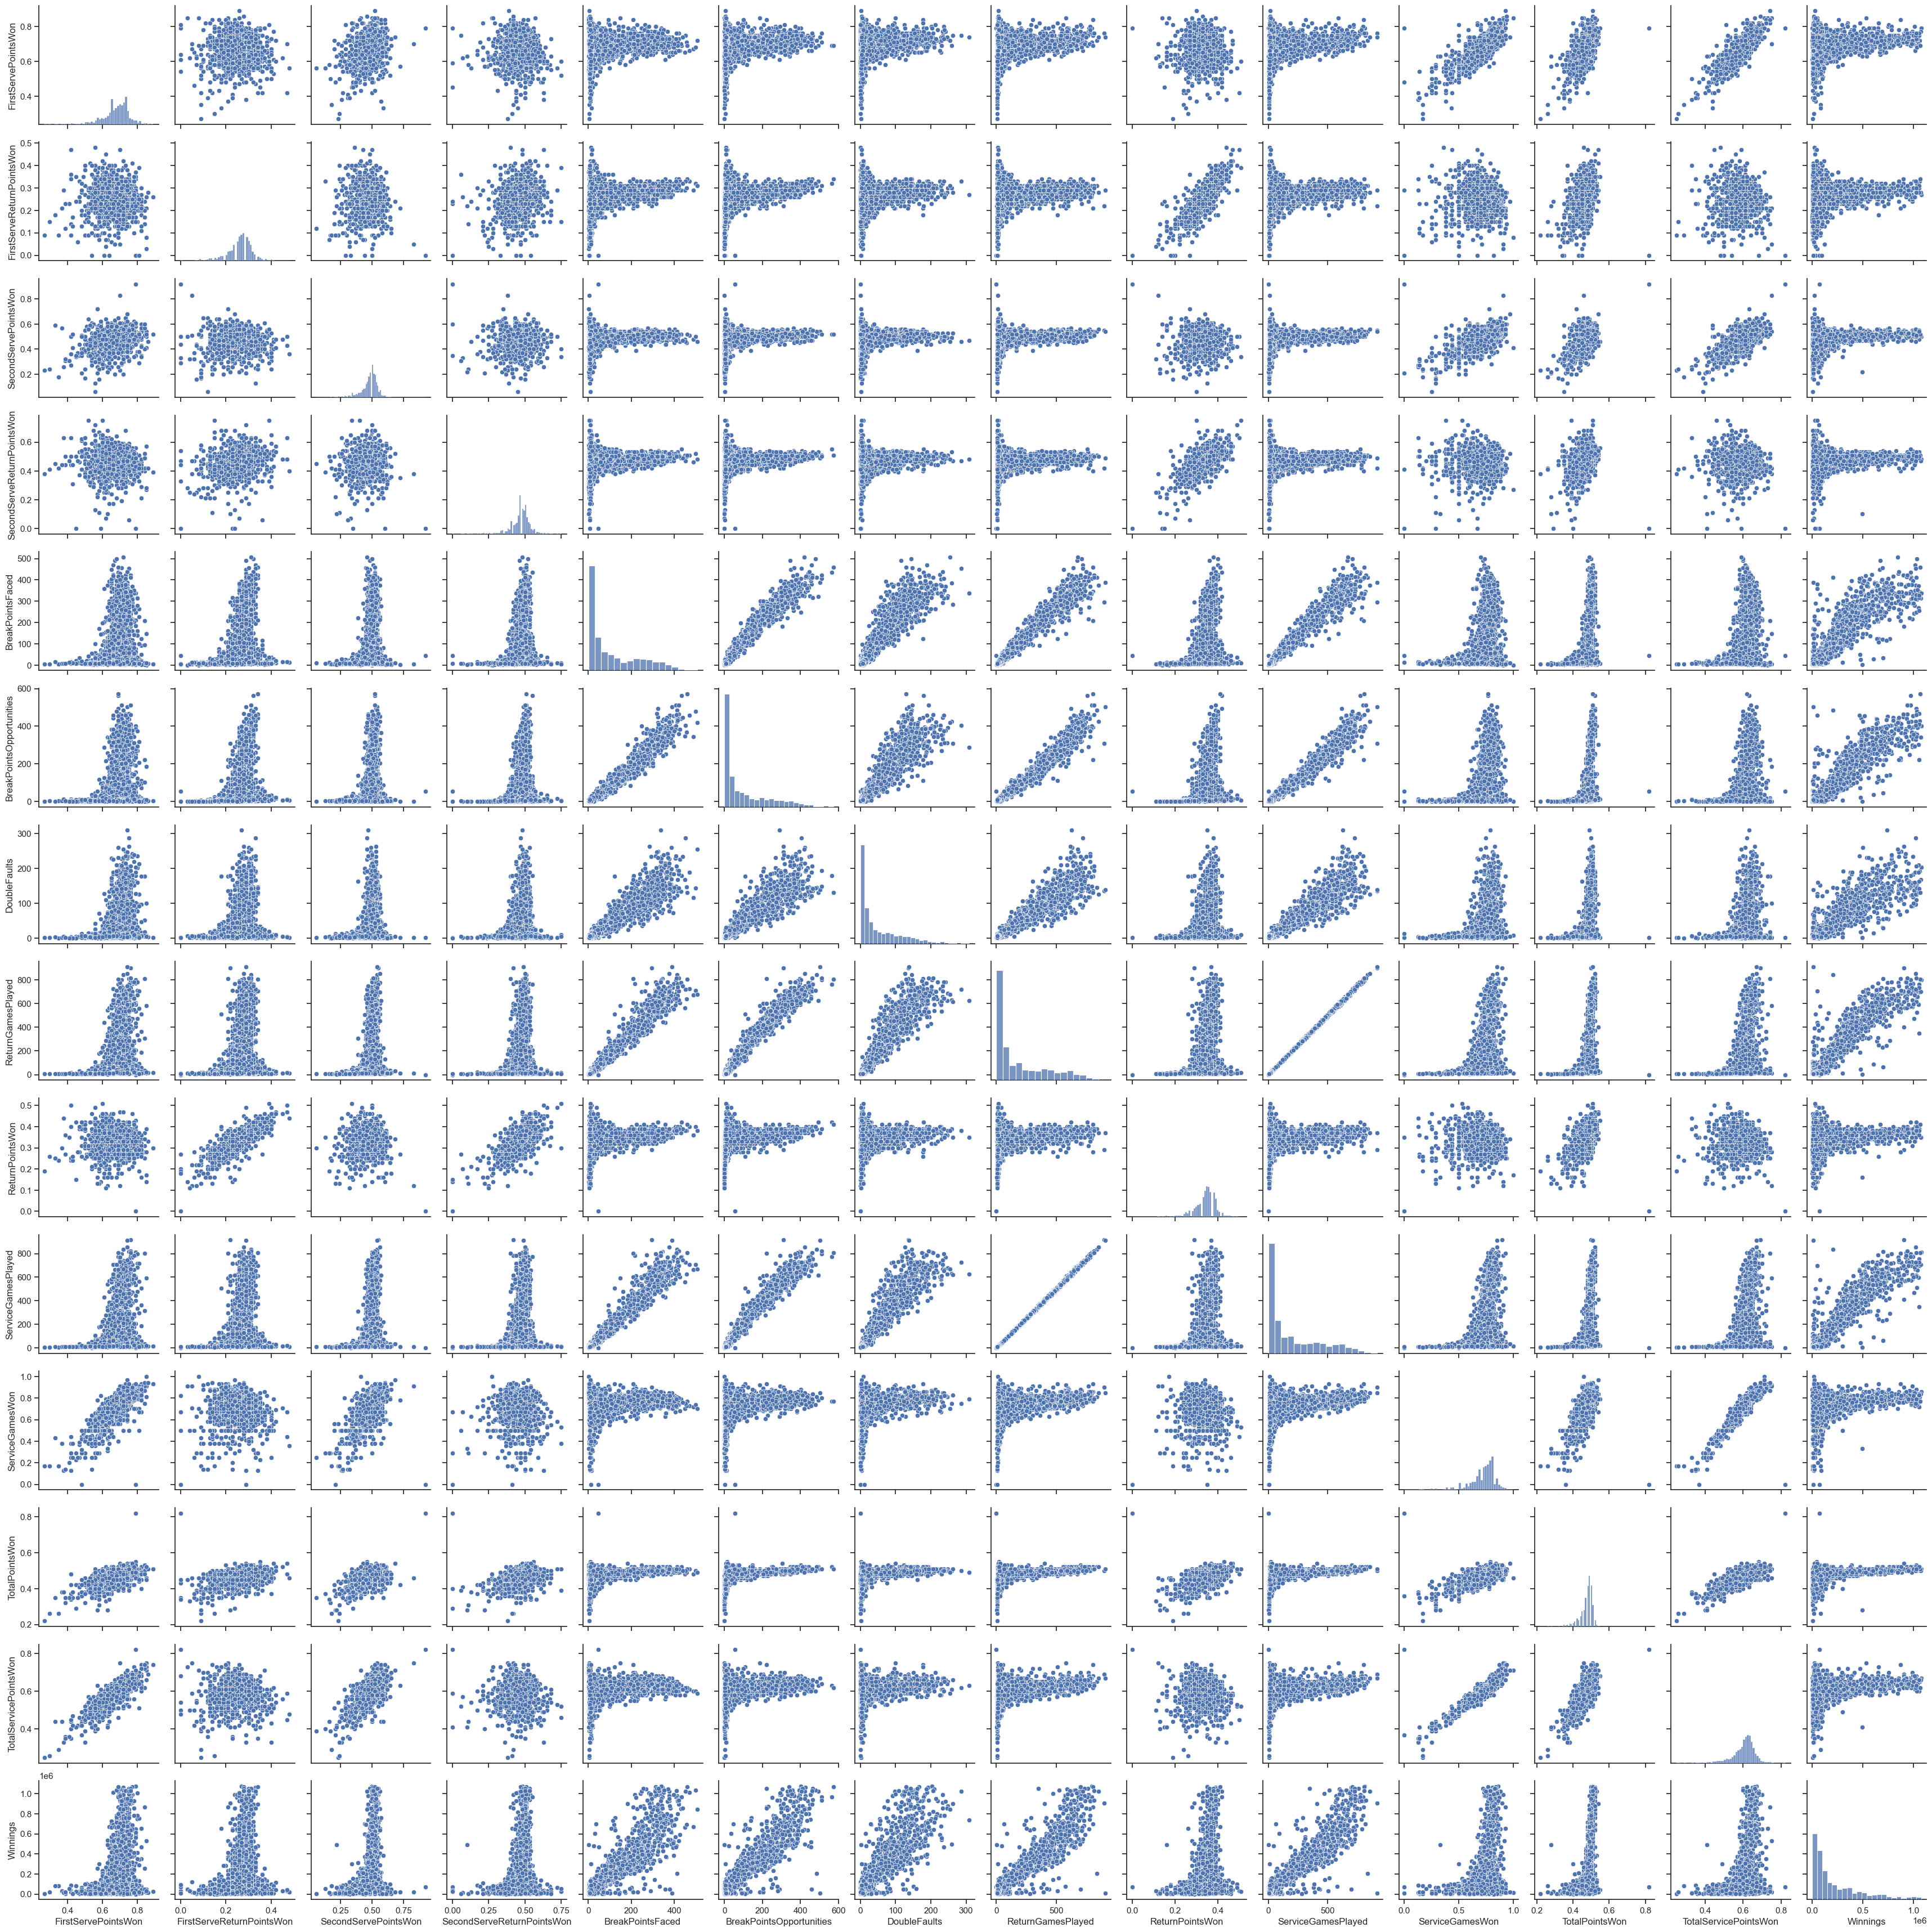

In [6]:
sns.set_theme(style="ticks")
sns.pairplot(df)
plt.show()

R^2: 0.7887693338801703


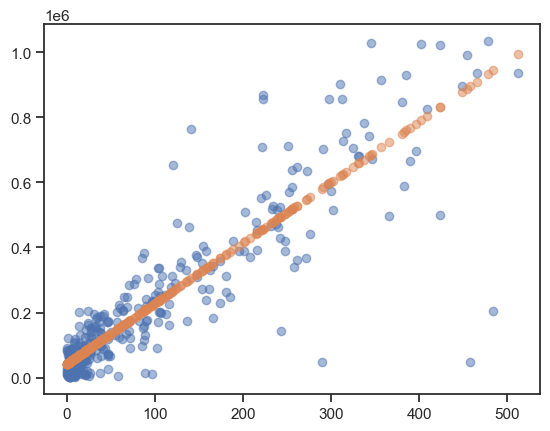

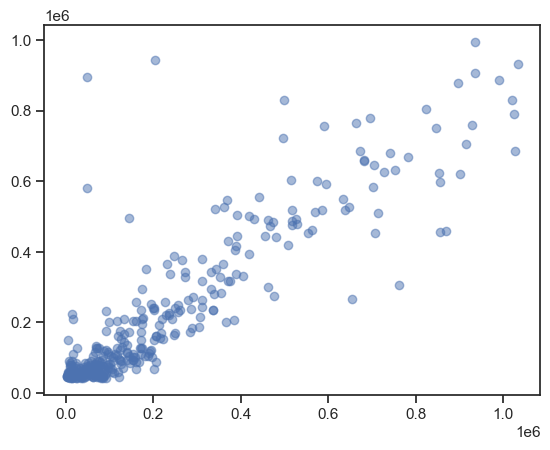

<Figure size 640x480 with 0 Axes>

In [7]:
data_X = df[['BreakPointsOpportunities']]
data_y = df[['Winnings']]
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size = 0.8)
model = LinearRegression()
model.fit(X_train,y_train)
print("R^2:",model.score(X_test, y_test))
y_predict = model.predict(X_test)
plt.scatter(X_test,y_test, alpha=0.5)
plt.scatter(X_test,y_predict, alpha=0.5)
plt.show()
plt.clf()
plt.scatter(y_test,y_predict, alpha=0.5)
plt.show()
plt.clf()

R^2: 0.32136464559911515


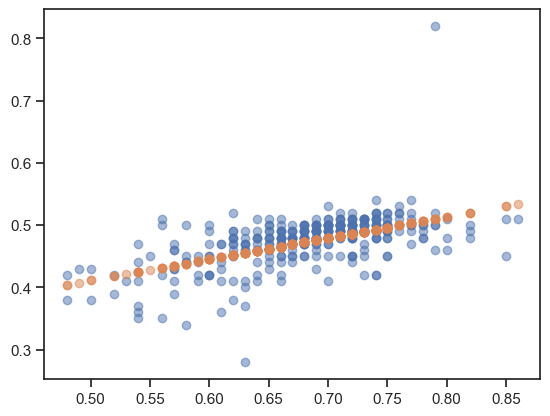

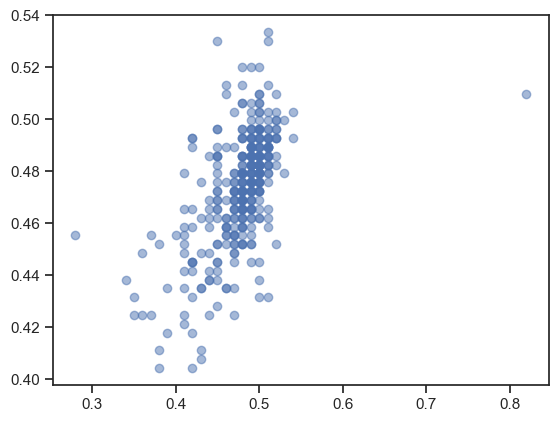

<Figure size 640x480 with 0 Axes>

In [8]:
data_X = df[['FirstServePointsWon']]
data_y = df[['TotalPointsWon']]
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size = 0.8)
model = LinearRegression()
model.fit(X_train,y_train)
print("R^2:",model.score(X_test, y_test))
y_predict = model.predict(X_test)
plt.scatter(X_test,y_test, alpha=0.5)
plt.scatter(X_test,y_predict, alpha=0.5)
plt.show()
plt.clf()
plt.scatter(y_test,y_predict, alpha=0.5)
plt.show()
plt.clf()



R^2: 0.8090941670956433


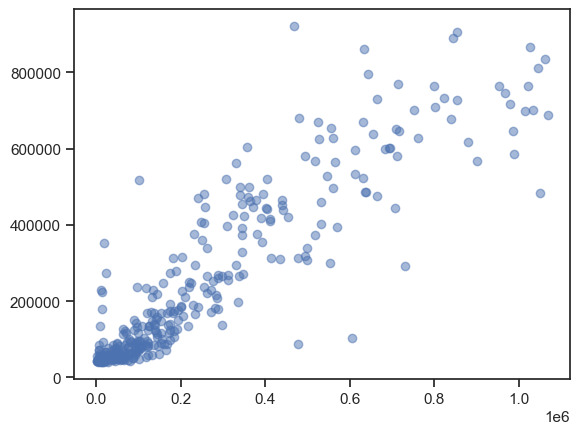

<Figure size 640x480 with 0 Axes>

In [9]:
data_X = df[['BreakPointsOpportunities', 'DoubleFaults']]
data_y = df[['Winnings']]
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size = 0.8)
model = LinearRegression()
model.fit(X_train,y_train)
print("R^2:",model.score(X_test, y_test))
y_predict = model.predict(X_test)
plt.show()
plt.clf()
plt.scatter(y_test,y_predict, alpha=0.5)
plt.show()
plt.clf()

R^2: 0.8046428498835847


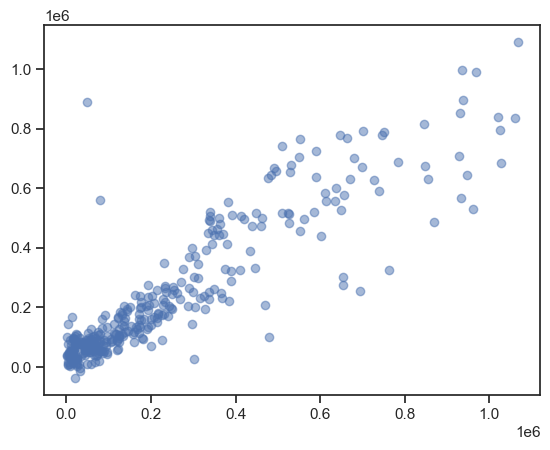

<Figure size 640x480 with 0 Axes>

In [10]:
data_X = df[['FirstServePointsWon', 'FirstServeReturnPointsWon', 'SecondServePointsWon', 'SecondServeReturnPointsWon', 'BreakPointsOpportunities', 'ReturnPointsWon', 'ServiceGamesWon']]
data_y = df[['Winnings']]
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size = 0.8)
model = LinearRegression()
model.fit(X_train,y_train)
print("R^2:",model.score(X_test, y_test))
y_predict = model.predict(X_test)
plt.show()
plt.clf()
plt.scatter(y_test,y_predict, alpha=0.5)
plt.show()
plt.clf()